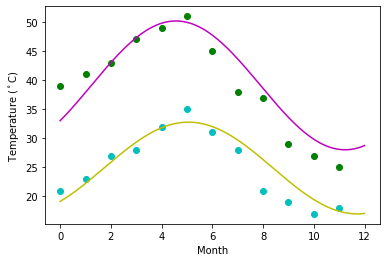

In [1]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Text(0.5, 1.0, 'Fare paid and the Age')

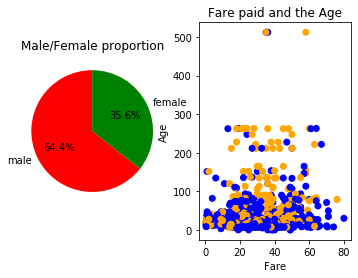

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url,skip_blank_lines=True)

#1. Create a pie chart presenting the male/female proportion
count=titanic['sex'].value_counts()
colors = ['red', 'green']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,
        autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

colors = {'male':'blue', 'female':'orange'}
ax2.scatter(titanic.age.iloc[:-1],titanic.fare.iloc[:-1],c=titanic['sex'].iloc[:-1].apply(lambda x: colors[x]))
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')